Data: https://universe.roboflow.com/yolo-do-it-yhopz/helmet-detector-9rzmg-bmd6q

# YOLO Training Configuration Parameters

This document explains the additional parameters used in the YOLO training process. These parameters allow for customization and optimization of the training pipeline.

## Parameters Explanation

### `batch=16`
- **Description**: Sets the batch size for training.
- **Impact**: Higher values may improve training speed but require more GPU memory.

### `device=0`
- **Description**: Specifies the GPU ID to use for training.
- **Options**: 
  - Use `0`, `1`, etc., for specific GPU IDs.
  - Use `'cpu'` if no GPU is available.

### `lr0=0.01`
- **Description**: Sets the initial learning rate for the optimizer.
- **Impact**: Affects how quickly the model weights are updated during training.

### `optimizer='Adam'`
- **Description**: Chooses the optimizer for training.
- **Options**:
  - `'Adam'` for Adam optimizer.
  - `'SGD'` for Stochastic Gradient Descent.

### `workers=8`
- **Description**: Specifies the number of worker threads for data loading.
- **Impact**: Higher values can improve data loading speeds but may require more system resources.

### `seed=42`
- **Description**: Ensures reproducibility by setting a random seed.
- **Impact**: Makes training results consistent across different runs.

### `patience=10`
- **Description**: Implements early stopping if validation metrics do not improve for the specified number of epochs.
- **Impact**: Prevents overfitting and saves training time.

### `weight_decay=0.0005`
- **Description**: Applies weight decay for regularization.
- **Impact**: Reduces overfitting by penalizing large weights.

### `momentum=0.937`
- **Description**: Momentum parameter for optimizers like SGD.
- **Impact**: Helps accelerate gradients vectors in the right direction, leading to faster convergence.

### `name='exp_name'`
- **Description**: Names the experiment and creates a folder in the `runs/train` directory.
- **Impact**: Helps organize and identify training experiments.

### `verbose=True`
- **Description**: Outputs detailed logs during training.
- **Impact**: Provides more visibility into the training process.

---

## Example Usage

```python
results = model.train(
    data="data.yaml",   # Path to dataset YAML file
    epochs=100,         # Number of training epochs
    imgsz=640,          # Image size (resolution)
    batch=16,           # Batch size
    device=0,           # GPU ID or 'cpu'
    lr0=0.01,           # Initial learning rate
    optimizer="Adam",   # Optimizer type
    workers=8,          # Number of dataloader workers
    seed=42,            # Random seed for reproducibility
    patience=10,        # Early stopping patience
    weight_decay=0.0005,  # Weight decay
    momentum=0.937,     # Momentum for SGD
    name="exp_name",    # Experiment name
    verbose=True        # Detailed logs
)


In [1]:
!nvidia-smi

Fri Nov 29 14:13:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:43:00.0 Off |                  Off |
| 30%   32C    P8              21W / 350W |      2MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [2]:

import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install ultralytics
!pip install roboflow

# Clean up the notebook
clean_notebook()



Notebook cleaned.


**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Setup complete ✅ (32 CPUs, 503.6 GB RAM, 1.4/152.0 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("yolo-do-it-yhopz").project("helmet-detector-9rzmg-bmd6q")
version = project.version(1)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...


In [6]:
dataset.location

'/workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detector-1'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [7]:

from ultralytics import YOLO
from IPython.display import Image

# Load the YOLO model
model = YOLO("yolo11n.pt")  # Load your model architecture or pre-trained weights

# Train the model with the specified configuration
results = model.train(
    data=f"{dataset.location}/data.yaml",  # Path to dataset YAML file
    epochs=50,         # Number of training epochs
    imgsz=640,          # Image size (resolution)
    batch=60,           # Batch size
    device=0,           # Specify GPU (0) or CPU ('cpu')
    lr0=0.001,           # Initial learning rate
    optimizer="Adam",   # Optimizer (e.g., 'SGD', 'Adam')
    workers=30,          # Number of dataloader workers
    seed=42,            # Random seed for reproducibility
    patience=10,        # Early stopping patience (number of epochs)
    weight_decay=0.0005,  # Weight decay for regularization
    momentum=0.937,     # Momentum for SGD
    name="exp_name",    # Name of the experiment folder
    verbose=True        # Print detailed training logs
)

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detector-1/data.yaml, epochs=50, time=None, patience=10, batch=60, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=30, project=None, name=exp_name, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

train: Scanning /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detector-1/train/labels.cache... 1702 images, 30 backgrounds, 0 corrupt: 100%|██████████| 1702/1702 [00:00<?, ?it/s]

train: WARNING ⚠️ /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detector-1/train/images/Bike-Helmet-Review-VS-Nutshell_mp4-0324_jpg.rf.e4a0571f1222a8bfec600370ce4f30d5.jpg: 22 duplicate labels removed
train: WARNING ⚠️ /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detector-1/train/images/Get-Your-Fit-Just-Right-With-Our-Helmet-Guide-cycling-helmets_mp4-0070_jpg.rf.3bc654b1d11028f9f00cd7662ec7c880.jpg: 53 duplicate labels removed
train: WARNING ⚠️ /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detector-1/train/images/Get-Your-Fit-Just-Right-With-Our-Helmet-Guide-cycling-helmets_mp4-0085_jpg.rf.9bd4848ca4141c4875ba11c89795fd30.jpg: 9 duplicate labels removed
train: WARNING ⚠️ /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detector-1/train/images/Get-Your-Fit-Just-Right-With-Our-Helmet-Guide-cycling-helmets_mp4-0151_jpg.rf.09d91c477a0da1ab0df8ff6c07e116d7.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detect


val: Scanning /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detector-1/valid/labels.cache... 572 images, 4 backgrounds, 0 corrupt: 100%|██████████| 572/572 [00:00<?, ?it/s]

val: WARNING ⚠️ /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detector-1/valid/images/Hardhats-Helmets-101_-Classification-and-ANSI-Standard-Breakdown_mp4-0217_jpg.rf.b82db26758ac408068753e0555f8b7c9.jpg: 13 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 779, len(boxes) = 886. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/exp_name/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 30 dataloader workers
Logging results to runs/detect/exp_name
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.83G     0.8148      3.207      1.162         64        640: 100%|██████████| 29/29 [00:04<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]

                   all        572        886   0.000676      0.226    0.00214   0.000401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.44G     0.7914      1.738       1.16         61        640: 100%|██████████| 29/29 [00:04<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all        572        886       0.91     0.0697      0.219      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.49G     0.7595      1.227      1.135         80        640: 100%|██████████| 29/29 [00:04<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]

                   all        572        886      0.788      0.119      0.383      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.43G     0.7629      1.107       1.14         83        640: 100%|██████████| 29/29 [00:04<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]

                   all        572        886       0.46      0.323      0.359      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       8.5G     0.7228     0.9966       1.11         72        640: 100%|██████████| 29/29 [00:04<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all        572        886      0.696      0.353      0.492       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       8.5G     0.7048     0.9018      1.091         59        640: 100%|██████████| 29/29 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]


                   all        572        886      0.697      0.514      0.566      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.43G     0.6734     0.8544      1.082         85        640: 100%|██████████| 29/29 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.68it/s]

                   all        572        886      0.625      0.647      0.676      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.43G     0.6749     0.8326      1.079         69        640: 100%|██████████| 29/29 [00:04<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all        572        886      0.668      0.531      0.616      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.49G     0.6546     0.7962      1.066         53        640: 100%|██████████| 29/29 [00:04<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all        572        886      0.847      0.671      0.773      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.43G     0.6441     0.7669      1.064         77        640: 100%|██████████| 29/29 [00:04<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all        572        886       0.85      0.713      0.793      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.43G     0.6384     0.7474      1.053         58        640: 100%|██████████| 29/29 [00:04<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]


                   all        572        886      0.733      0.686      0.776      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.43G     0.6116     0.7181      1.051         81        640: 100%|██████████| 29/29 [00:04<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]


                   all        572        886       0.75      0.768      0.789      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.47G     0.5882     0.6923      1.031         79        640: 100%|██████████| 29/29 [00:04<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]


                   all        572        886       0.77      0.789      0.814      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       8.5G     0.5879     0.6683      1.025         68        640: 100%|██████████| 29/29 [00:04<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]


                   all        572        886      0.832      0.837      0.852      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.51G     0.5825     0.6705      1.028         75        640: 100%|██████████| 29/29 [00:04<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all        572        886      0.826      0.795      0.827      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.43G     0.5751     0.6447      1.021         88        640: 100%|██████████| 29/29 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]

                   all        572        886      0.859      0.821      0.843       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.43G     0.5633      0.619      1.014         66        640: 100%|██████████| 29/29 [00:04<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all        572        886      0.832      0.856      0.865      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.43G     0.5517     0.6137      1.004         70        640: 100%|██████████| 29/29 [00:04<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]


                   all        572        886      0.852      0.833      0.857       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.49G     0.5481     0.6068      1.009         90        640: 100%|██████████| 29/29 [00:04<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all        572        886       0.83      0.845       0.85      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.49G     0.5409     0.6058      1.005         61        640: 100%|██████████| 29/29 [00:04<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all        572        886      0.873       0.85      0.871      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.51G     0.5307     0.5884     0.9997         62        640: 100%|██████████| 29/29 [00:04<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all        572        886      0.917      0.865      0.872      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.47G     0.5232     0.5525     0.9923         83        640: 100%|██████████| 29/29 [00:04<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all        572        886      0.843      0.803      0.852      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.49G     0.5268     0.5612     0.9983         75        640: 100%|██████████| 29/29 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]

                   all        572        886      0.896      0.817      0.866      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.51G     0.5275     0.5529     0.9952         97        640: 100%|██████████| 29/29 [00:04<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]

                   all        572        886      0.879      0.875      0.882      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.43G     0.5061      0.532     0.9886         98        640: 100%|██████████| 29/29 [00:04<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all        572        886      0.894      0.856      0.873       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.49G     0.4998     0.5322     0.9834         88        640: 100%|██████████| 29/29 [00:04<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all        572        886      0.916      0.876      0.889      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.43G     0.4979      0.515      0.979         64        640: 100%|██████████| 29/29 [00:04<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]

                   all        572        886      0.928      0.868      0.889      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.51G     0.4886      0.503     0.9767         72        640: 100%|██████████| 29/29 [00:04<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all        572        886      0.903      0.877      0.886      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.51G      0.483     0.5085     0.9764         94        640: 100%|██████████| 29/29 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        572        886      0.917      0.874      0.889      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.47G     0.4794     0.5044     0.9725         71        640: 100%|██████████| 29/29 [00:04<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]


                   all        572        886      0.881      0.873      0.883        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.47G     0.4716     0.4826     0.9724         92        640: 100%|██████████| 29/29 [00:04<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        572        886      0.898      0.892      0.899      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.52G     0.4728     0.4826     0.9758         72        640: 100%|██████████| 29/29 [00:04<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]

                   all        572        886      0.907      0.876      0.891      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.43G     0.4698      0.488     0.9708         66        640: 100%|██████████| 29/29 [00:04<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all        572        886      0.921      0.882      0.899      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.49G      0.455     0.4776     0.9616         79        640: 100%|██████████| 29/29 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all        572        886       0.93      0.865      0.895      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.49G     0.4547     0.4676     0.9601         80        640: 100%|██████████| 29/29 [00:04<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]

                   all        572        886      0.925      0.875      0.897      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.43G      0.441     0.4576      0.956         80        640: 100%|██████████| 29/29 [00:04<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]

                   all        572        886      0.931      0.864      0.896      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.49G     0.4349     0.4388     0.9493         75        640: 100%|██████████| 29/29 [00:04<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        572        886      0.878      0.897      0.898      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.43G     0.4271     0.4457     0.9509         78        640: 100%|██████████| 29/29 [00:04<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all        572        886      0.928      0.883      0.903      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.43G     0.4329     0.4469     0.9538         86        640: 100%|██████████| 29/29 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all        572        886      0.895      0.902        0.9      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.43G      0.423     0.4225       0.94         80        640: 100%|██████████| 29/29 [00:04<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all        572        886        0.9      0.901      0.906      0.831


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.82G     0.3933     0.4174     0.9143         35        640: 100%|██████████| 29/29 [00:12<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        572        886      0.914      0.893      0.905      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       8.4G     0.3824     0.4052     0.9191         28        640: 100%|██████████| 29/29 [00:04<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all        572        886      0.923      0.885      0.908      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.43G     0.3685     0.3848     0.9159         28        640: 100%|██████████| 29/29 [00:04<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]

                   all        572        886      0.937      0.875      0.903      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       8.4G     0.3674     0.3706     0.9068         41        640: 100%|██████████| 29/29 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all        572        886      0.919      0.893      0.904       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.41G     0.3555     0.3602     0.9027         34        640: 100%|██████████| 29/29 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

                   all        572        886      0.894      0.903      0.905      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       8.4G      0.349      0.363     0.8958         42        640: 100%|██████████| 29/29 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]

                   all        572        886      0.942      0.881      0.906      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.41G     0.3461     0.3468      0.893         40        640: 100%|██████████| 29/29 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all        572        886      0.914      0.898      0.908      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       8.4G     0.3356     0.3378     0.8921         37        640: 100%|██████████| 29/29 [00:04<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]

                   all        572        886      0.912      0.901      0.906      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       8.4G     0.3379     0.3325     0.8913         33        640: 100%|██████████| 29/29 [00:04<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all        572        886      0.919      0.893      0.908      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.41G     0.3302     0.3329     0.8898         35        640: 100%|██████████| 29/29 [00:04<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all        572        886       0.92      0.897      0.909      0.838



50 epochs completed in 0.089 hours.
Optimizer stripped from runs/detect/exp_name/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/exp_name/weights/best.pt, 5.5MB

Validating runs/detect/exp_name/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
YOLO11n summary (fused): 238 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]


                   all        572        886       0.92      0.897      0.909      0.838
        Cycling Helmet         68         68      0.993          1      0.995      0.986
             half face         32         32      0.984          1      0.995      0.991
              hard hat         67         86      0.874      0.888      0.895      0.861
                helmet        111        114      0.975      0.956      0.987       0.92
        modular helmet         14         14      0.965          1      0.995      0.975
             motorbike         69         84      0.877      0.464      0.625      0.365
          motorcyclist         30         31      0.961      0.968      0.972      0.874
              nutshell         65        106      0.865      0.907      0.943      0.899
                person        105        133      0.857      0.624      0.658      0.482
                 plate         53         60      0.936      0.983      0.979      0.839
   quarter face helme

**Step # 05 Examine Training Results**

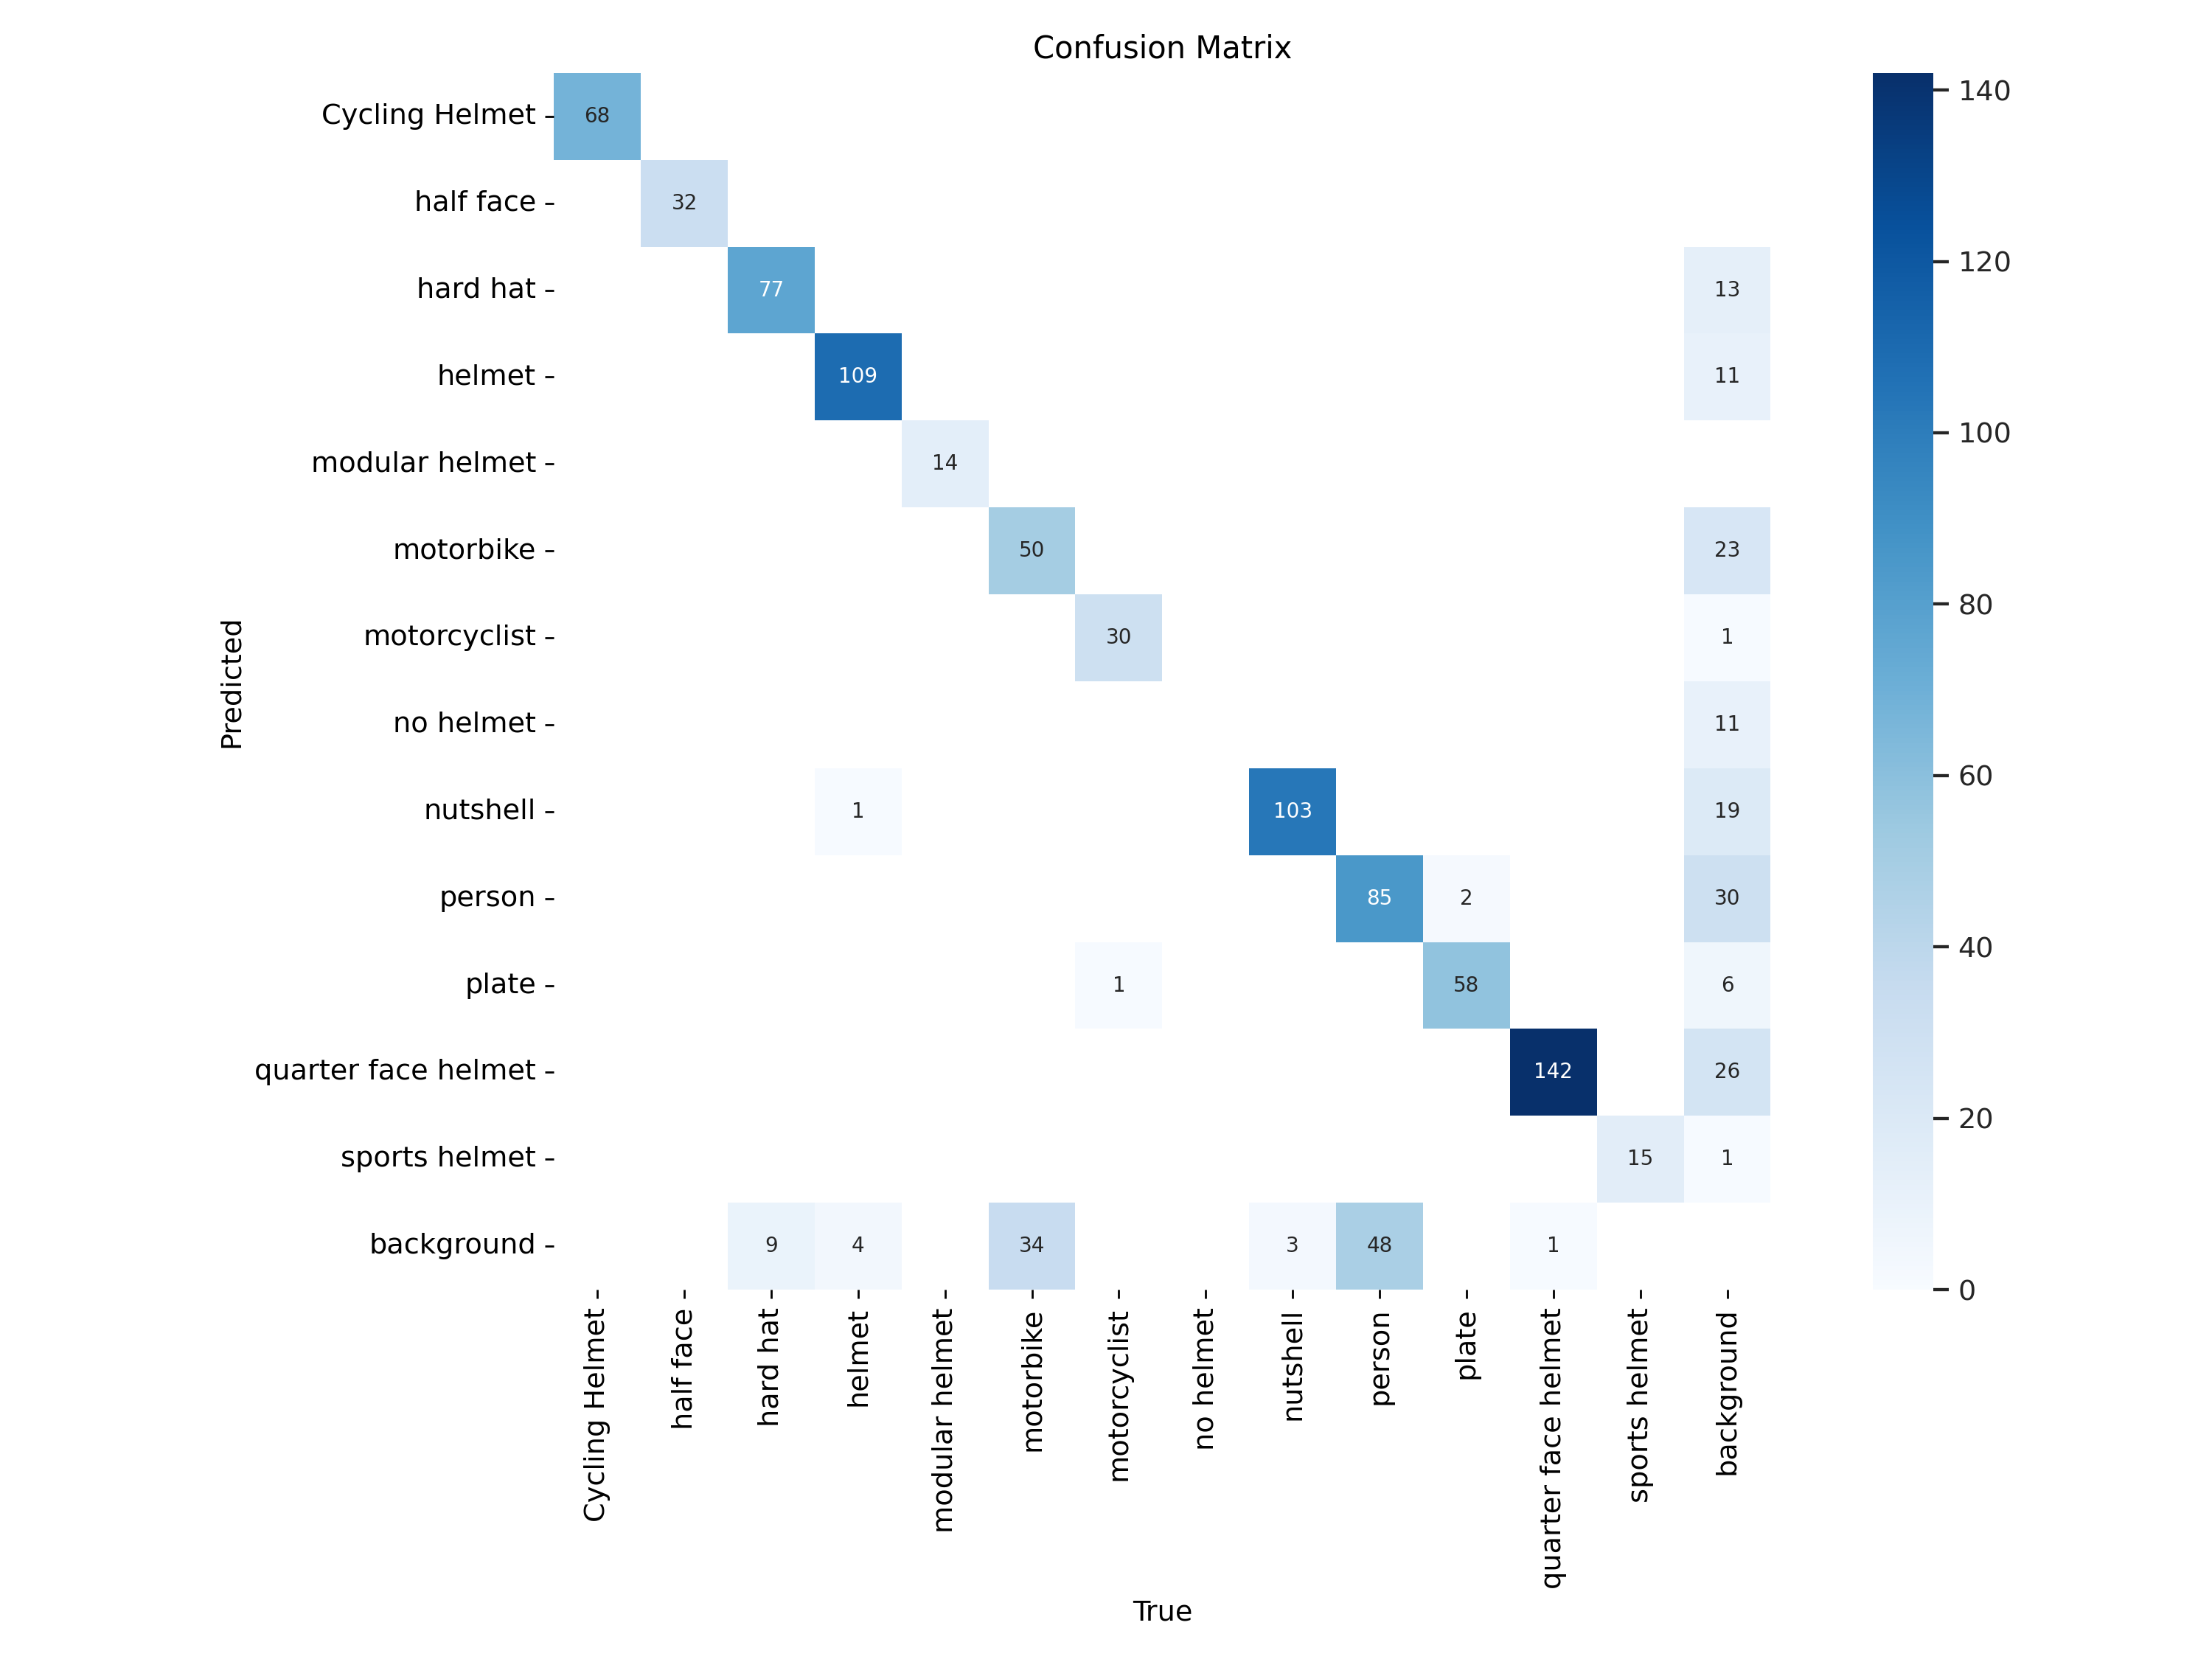

In [18]:
Image("./runs/detect/exp_name/confusion_matrix.png", width=900)

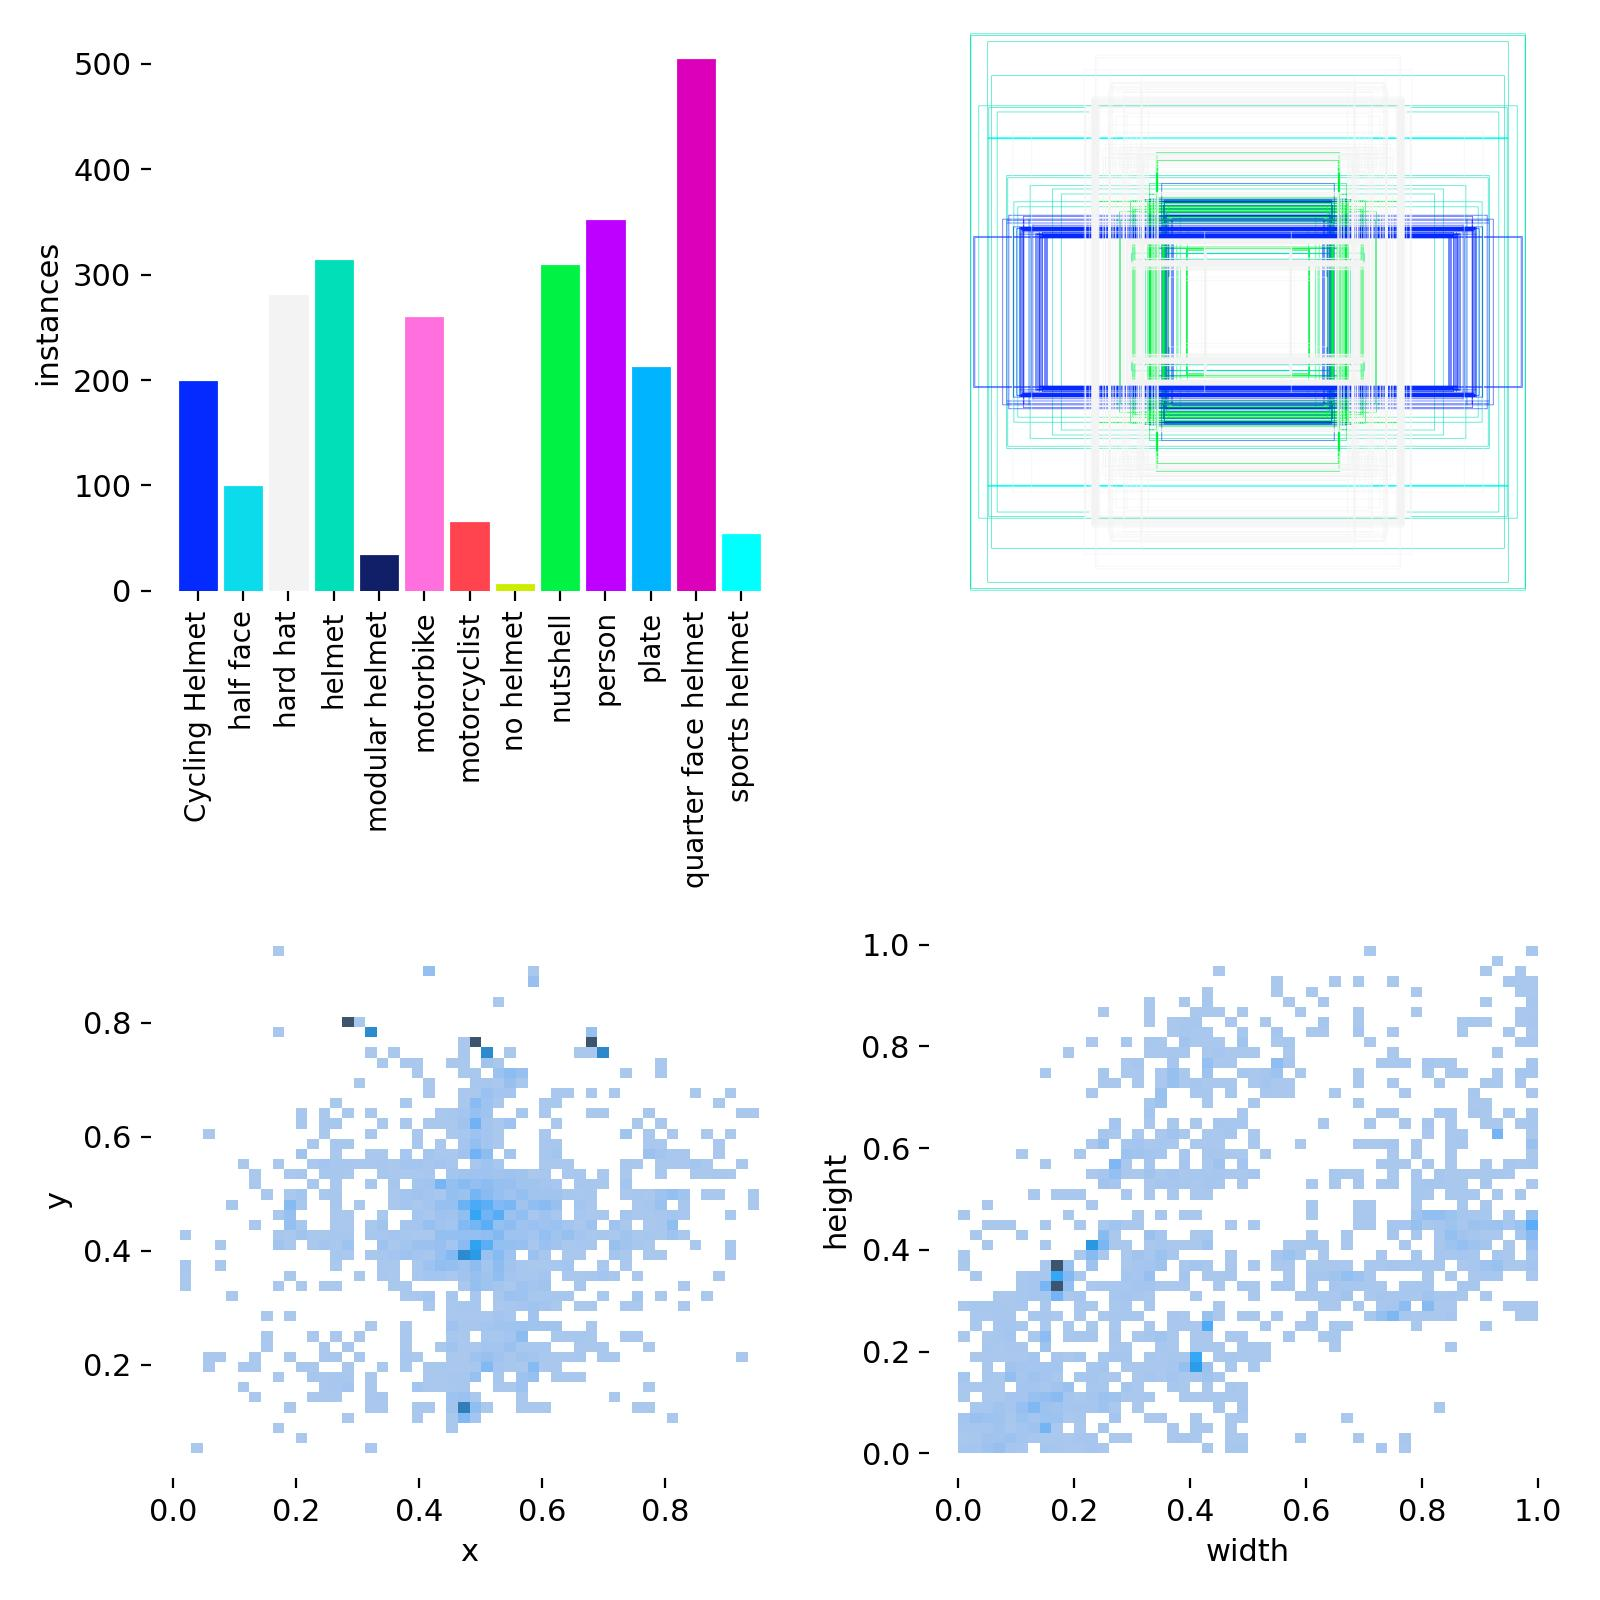

In [19]:
Image("./runs/detect/exp_name/labels.jpg", width=900)

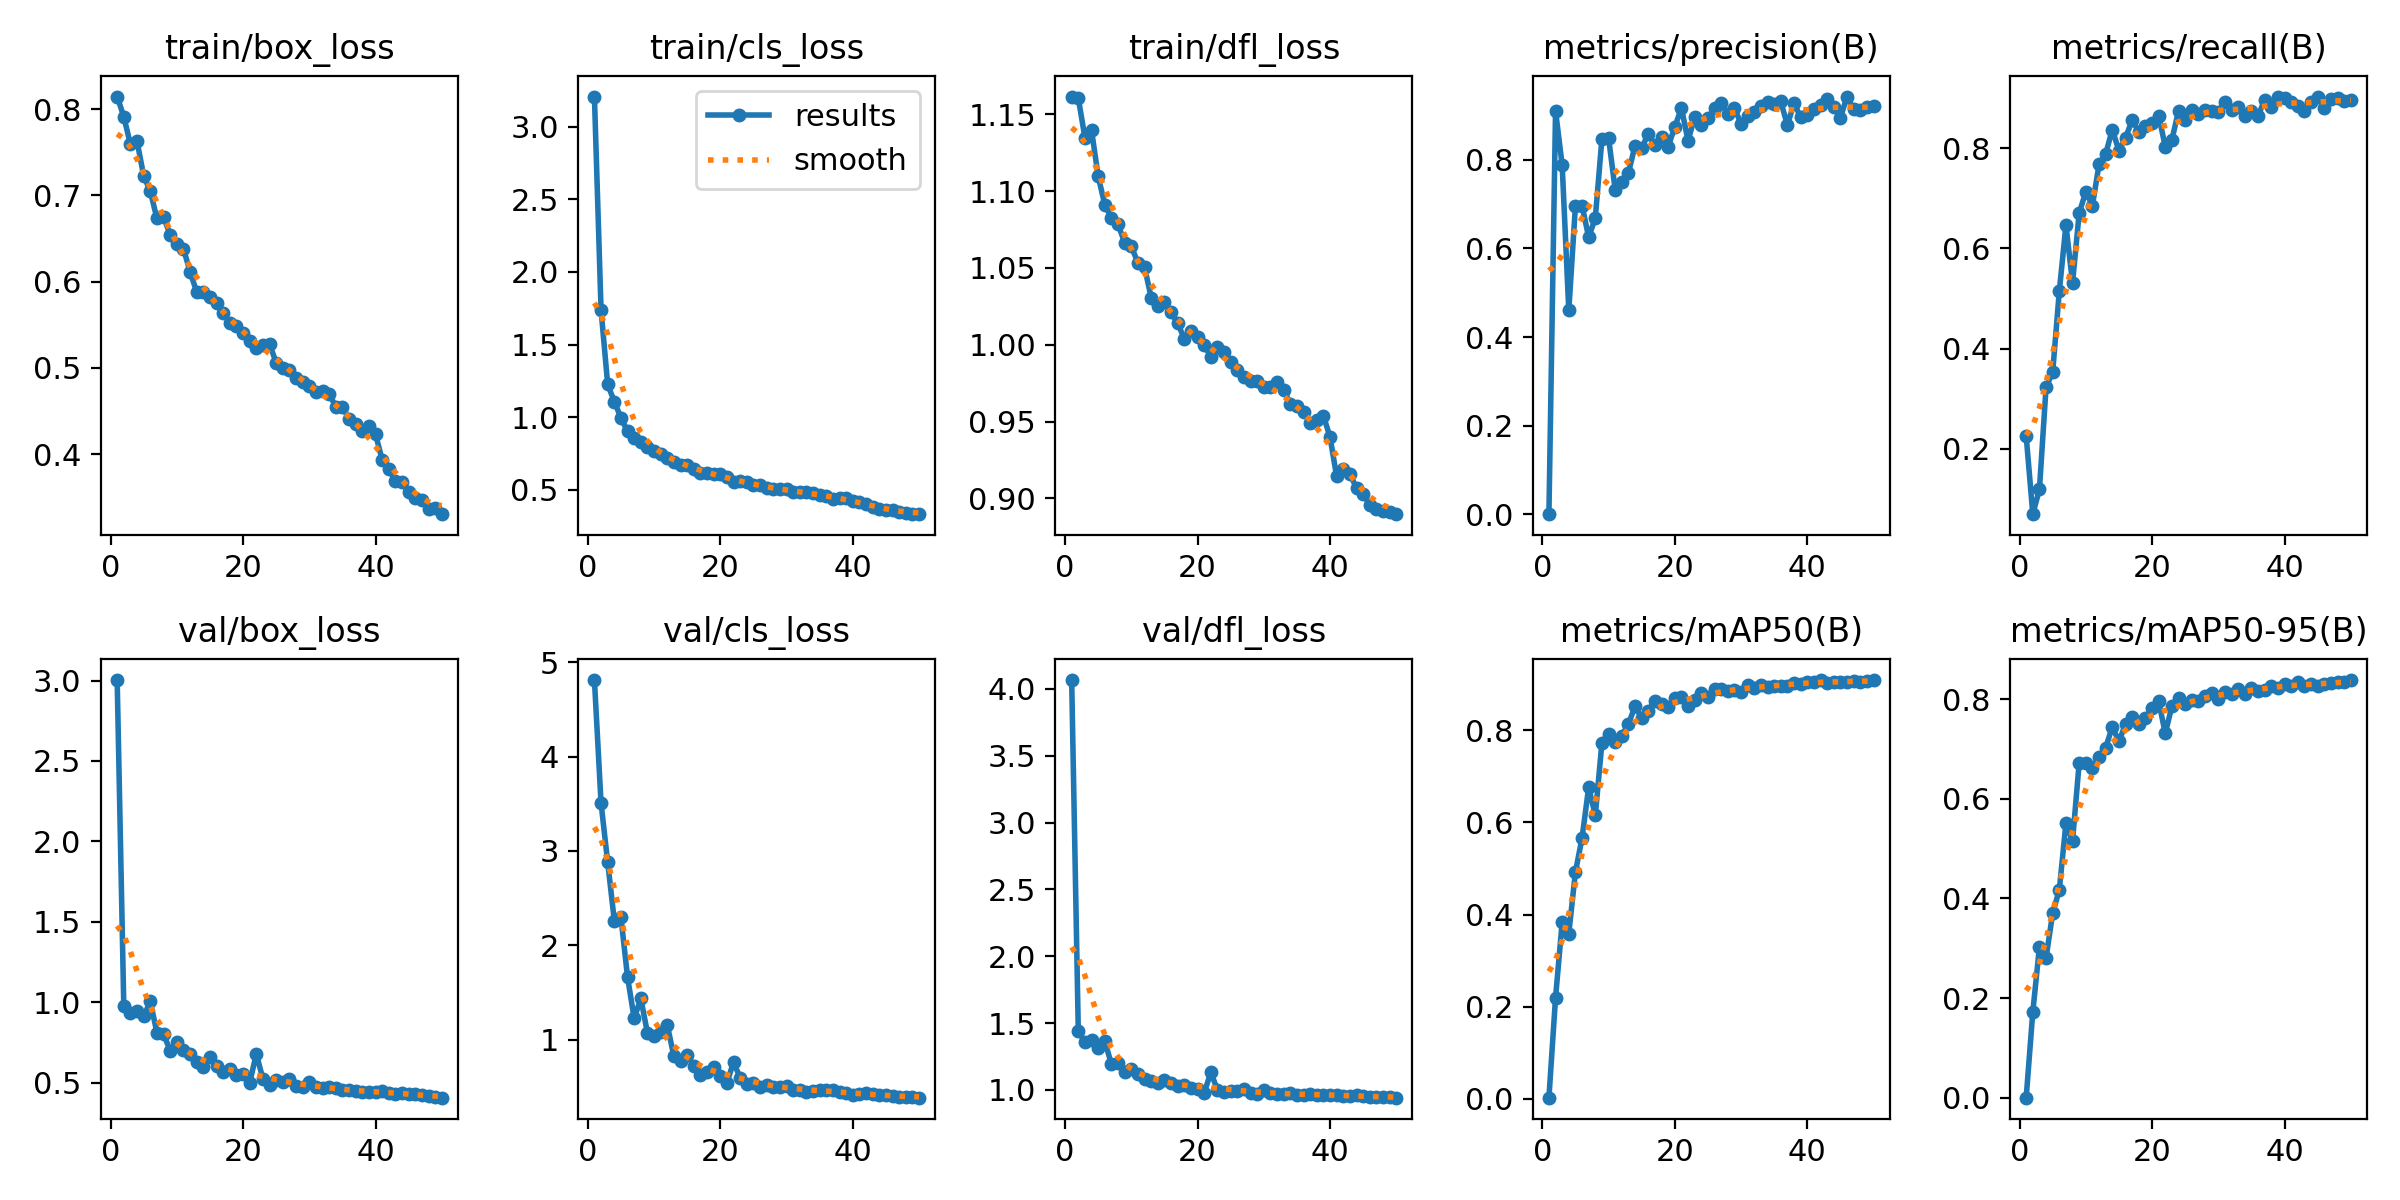

In [20]:
Image("./runs/detect/exp_name/results.png", width=900)

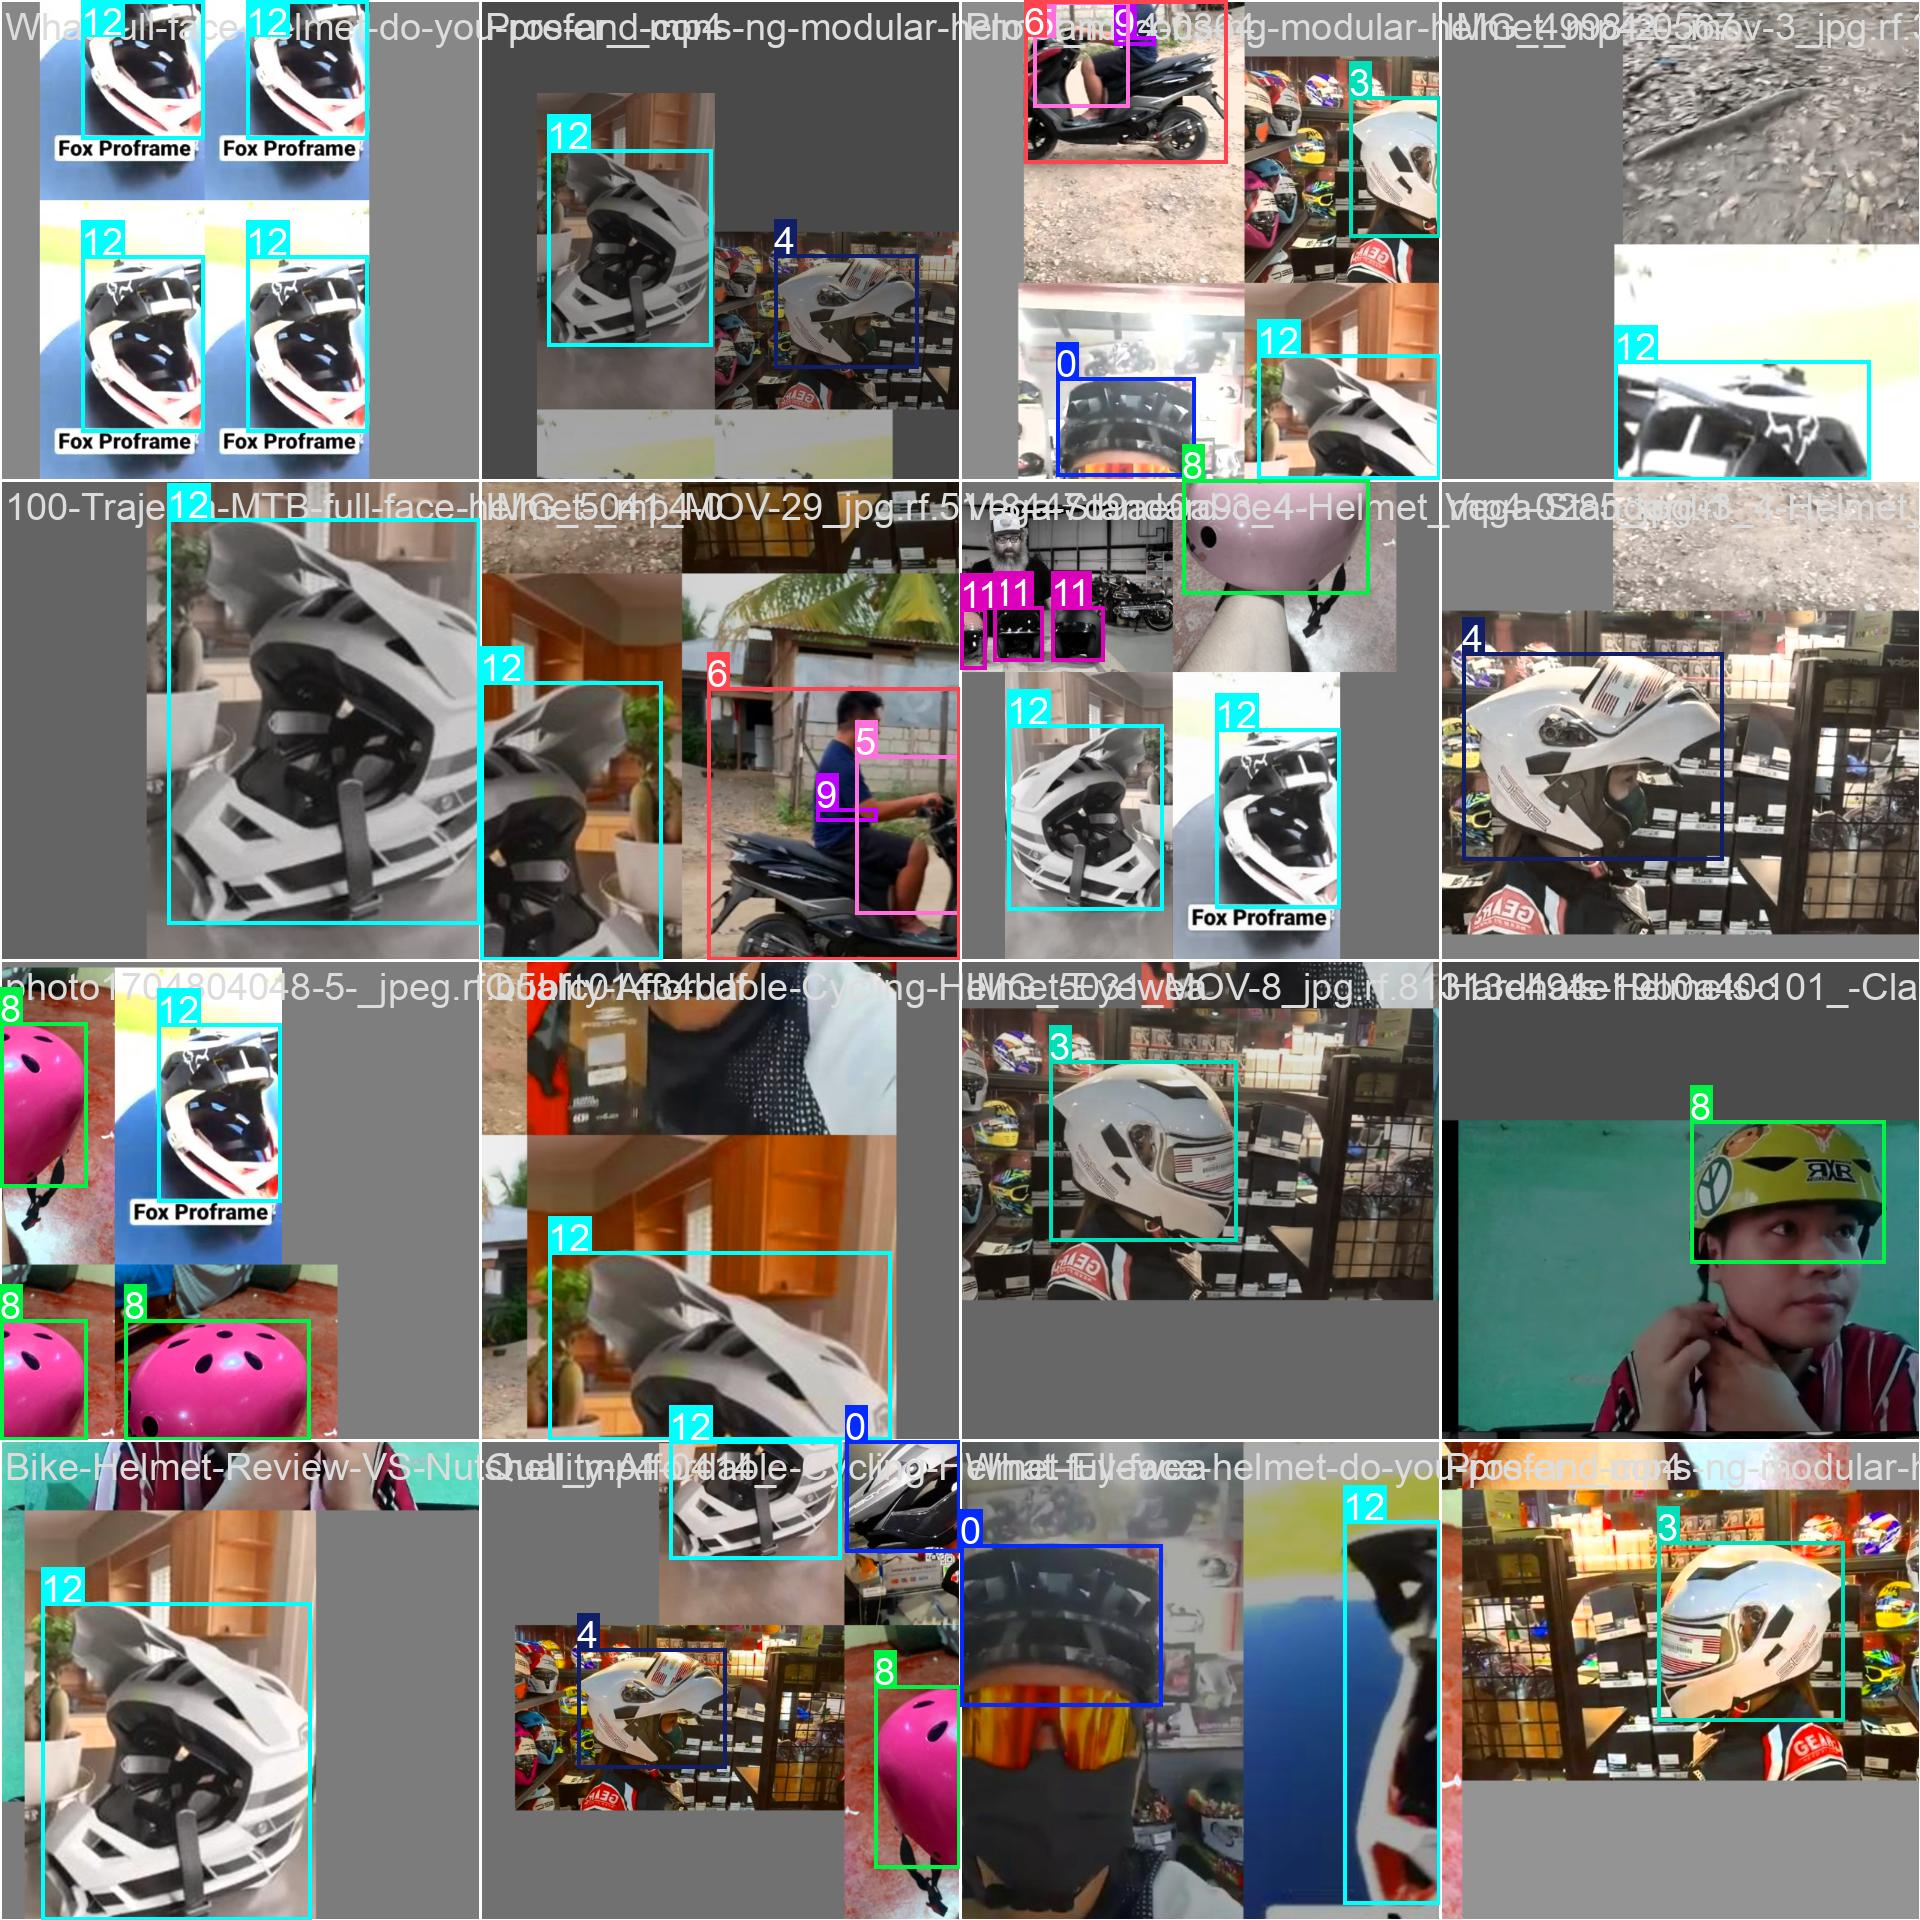

In [22]:
Image("./runs/detect/exp_name/train_batch0.jpg", width=900)

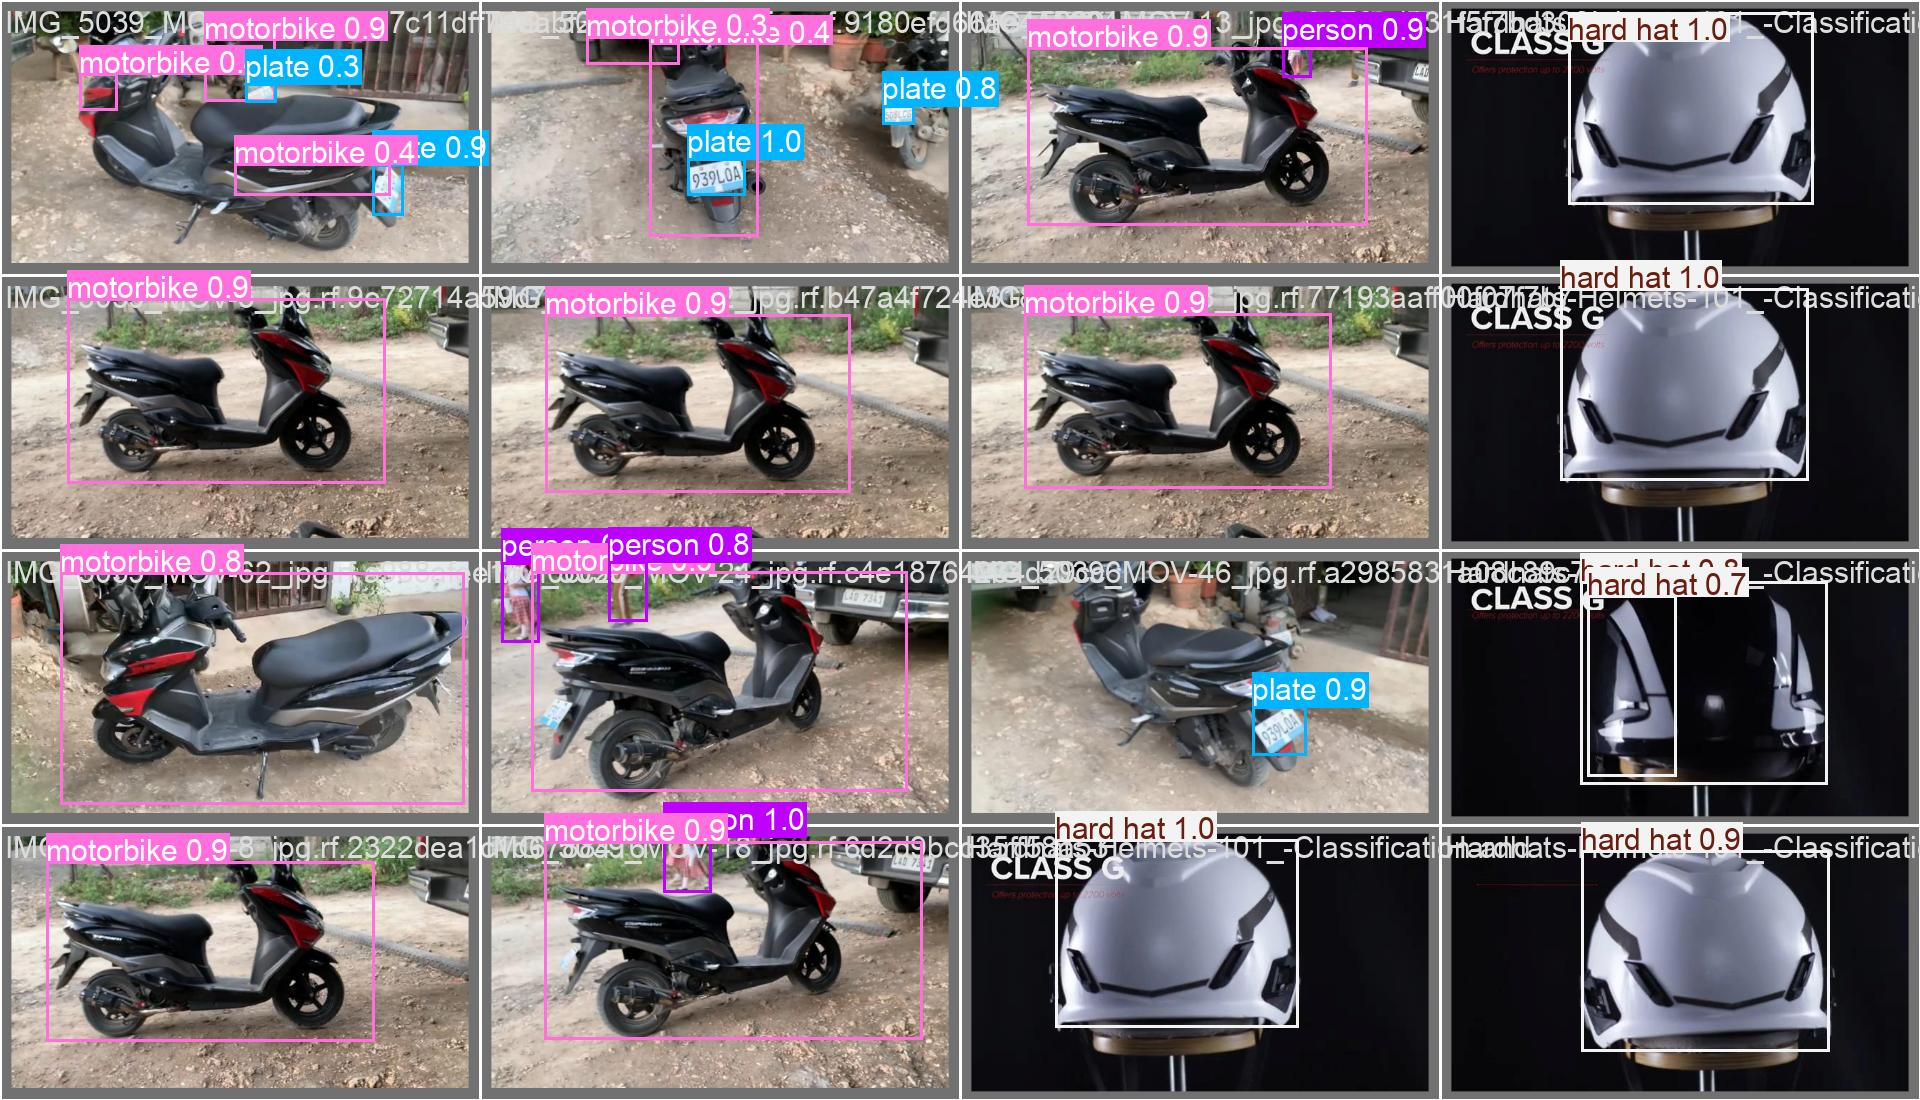

In [23]:
Image("./runs/detect/exp_name/val_batch0_pred.jpg", width=900)

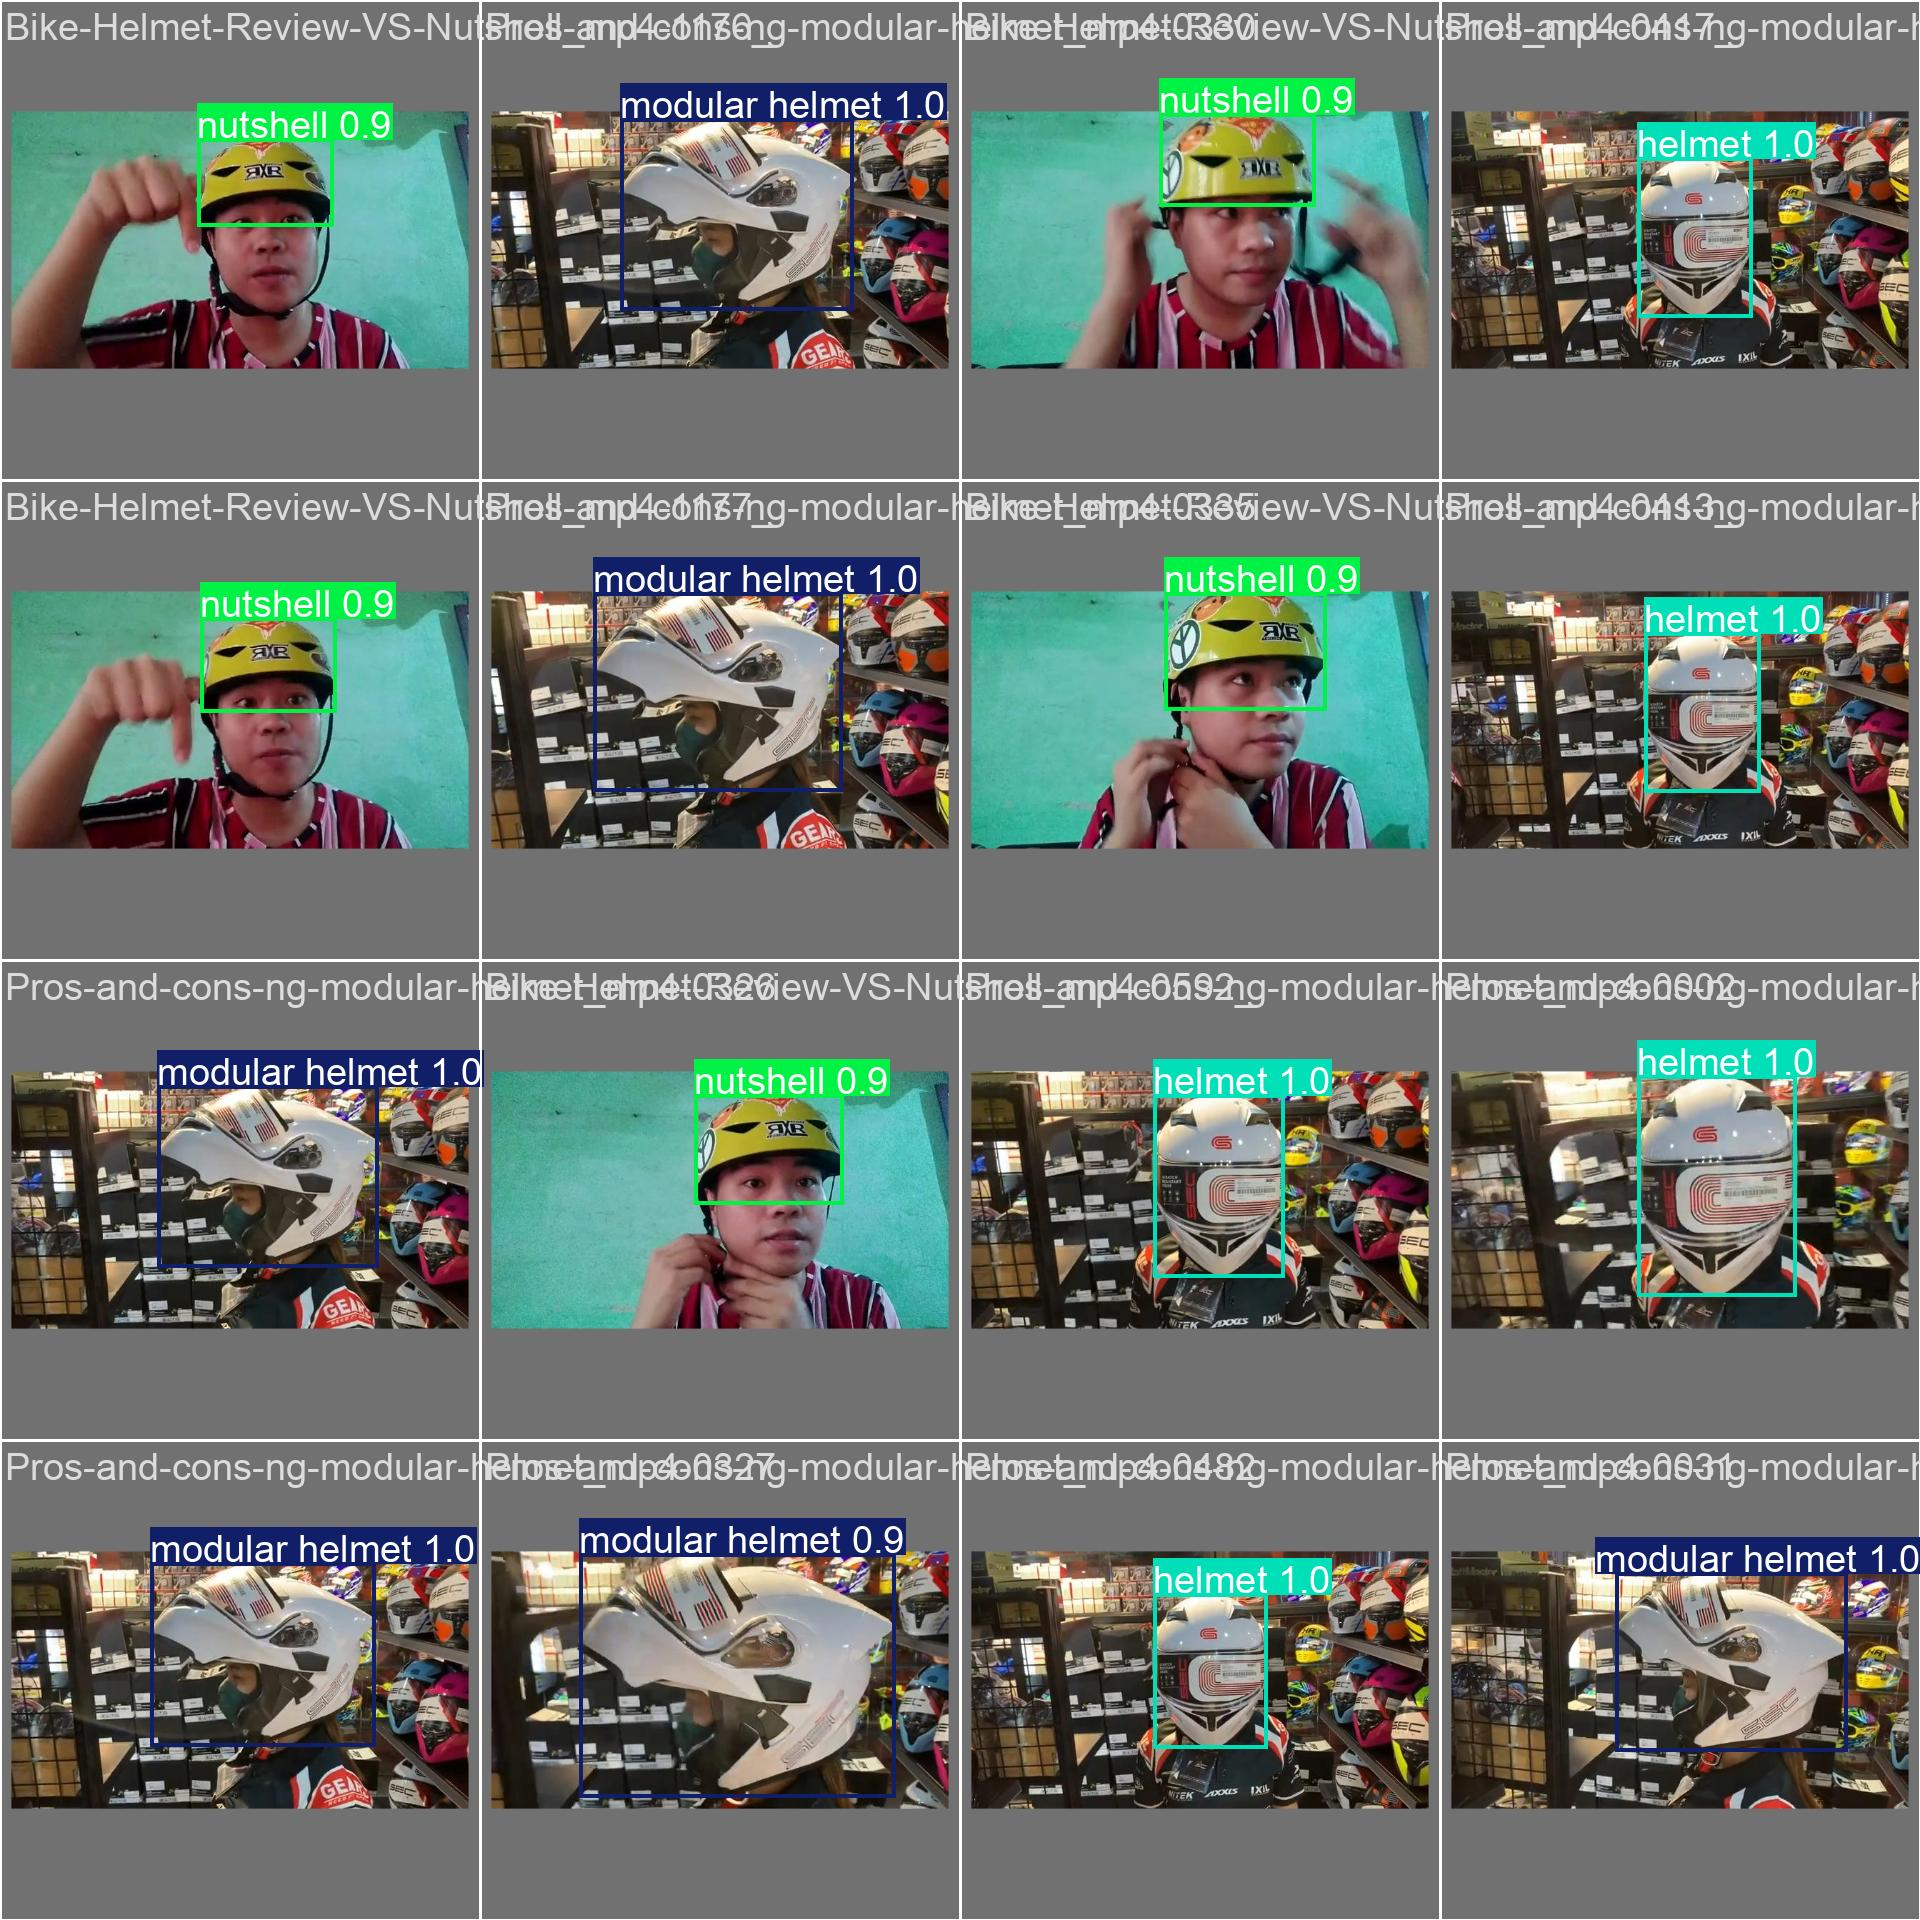

In [24]:
Image("./runs/detect/exp_name/val_batch1_pred.jpg", width=600)

**Step # 08 Inference with Custom Model on Images**

In [25]:
# Perform validation
results = model.val(
    data=f"{dataset.location}/data.yaml",  # Path to the dataset YAML file
    batch=8,                  # Batch size for validation
    imgsz=640,                 # Image size for validation
    conf=0.001,                # Confidence threshold for predictions
    iou=0.6,                   # IoU threshold for NMS
    device=0,                  # Specify GPU (0) or CPU ('cpu')
    split="val"                # Split to validate on (default: 'val')
)


Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)


val: Scanning /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detector-1/valid/labels.cache... 572 images, 4 backgrounds, 0 corrupt: 100%|██████████| 572/572 [00:00<?, ?it/s]

val: WARNING ⚠️ /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Helmet-Detector-1/valid/images/Hardhats-Helmets-101_-Classification-and-ANSI-Standard-Breakdown_mp4-0217_jpg.rf.b82db26758ac408068753e0555f8b7c9.jpg: 13 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 779, len(boxes) = 886. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:02<00:00, 30.73it/s]


                   all        572        886      0.923      0.897      0.911      0.837
        Cycling Helmet         68         68      0.992          1      0.995      0.983
             half face         32         32      0.983          1      0.995      0.991
              hard hat         67         86      0.874      0.889      0.896      0.861
                helmet        111        114      0.975      0.956      0.987      0.914
        modular helmet         14         14      0.966          1      0.995      0.972
             motorbike         69         84      0.887      0.466      0.644      0.369
          motorcyclist         30         31       0.96      0.968      0.974      0.877
              nutshell         65        106      0.868      0.906      0.948      0.903
                person        105        133      0.881      0.624      0.661      0.481
                 plate         53         60      0.935      0.983      0.979      0.837
   quarter face helme